In [21]:
library(dplyr)
library(ggplot2)

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpmms4se\downloaded_packages


In [2]:
data <- read.csv("data.csv")

In [3]:
str(data)

'data.frame':	541909 obs. of  8 variables:
 $ InvoiceNo  : chr  "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr  "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr  "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : int  6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: chr  "12/1/2010 8:26" "12/1/2010 8:26" "12/1/2010 8:26" "12/1/2010 8:26" ...
 $ UnitPrice  : num  2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : int  17850 17850 17850 17850 17850 17850 17850 17850 17850 13047 ...
 $ Country    : chr  "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


In [4]:
summary(data)

  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
 InvoiceDate          UnitPrice           CustomerID       Country         
 Length:541909      Min.   :-11062.06   Min.   :12346    Length:541909     
 Class :character   1st Qu.:     1.25   1st Qu.:13953    Class :character  
 Mode  :character   Median :     2.08   Median :15152    Mode  :character  
                    Mean   :     4.61   Mean   :15288                   

# 去除異常值

In [5]:
# 去除NA 值
data<-na.omit(data)
# 去掉UnitPrice <0的資料
data <- data[data$UnitPrice>0,]
# 去除 Quantity < 0 的資料
data <- data[data$Quantity>0,]

# 轉換資料型態

In [6]:
data$InvoiceDate <-as.Date(data$InvoiceDate,format='%m/%d/%Y')

data$CustomerID <- as.character(data$CustomerID)


# 抓出RFM值

In [7]:
enddate <- as.Date("2011-12-10")

RFM <- data %>%
  group_by(CustomerID) %>%
  summarise(Frequency=n(),# number of customerID
           Recency=as.numeric(enddate-max(InvoiceDate)), 
           Monetary=sum(Quantity*UnitPrice)/n_distinct(InvoiceNo) 
           # Average of each perchase amount
         )

`summarise()` ungrouping output (override with `.groups` argument)



In [8]:
RFM[0:15,]

CustomerID,Frequency,Recency,Monetary
<chr>,<int>,<dbl>,<dbl>
12346,1,326,77183.6000
12347,182,3,615.7143
12348,31,76,449.3100
12349,73,19,1757.5500
12350,17,311,334.4000
12352,85,37,313.2550
12353,4,205,89.0000
12354,58,233,1079.4000
12355,13,215,459.4000


# 觀察數據

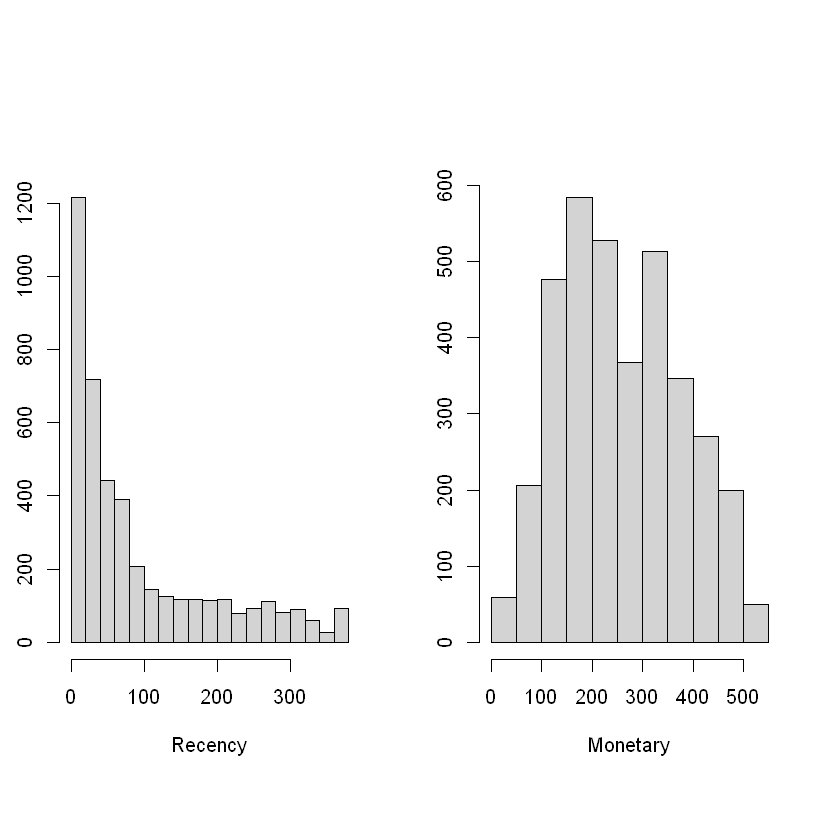

In [29]:
par(mfrow=c(1,2),pin=c(2.5,4))
#Recency越小訂單數量越多，代表有成長趨勢
hist(RFM$Recency,xlab="Recency",main="")
#大部分客戶購買金額落在100~350 之間
hist(sort(RFM$Monetary)[0:3600],xlab="Monetary",main="")


In [10]:
summary(RFM)

  CustomerID          Frequency          Recency          Monetary       
 Length:4338        Min.   :   1.00   Min.   :  1.00   Min.   :    3.45  
 Class :character   1st Qu.:  17.00   1st Qu.: 18.00   1st Qu.:  178.62  
 Mode  :character   Median :  41.00   Median : 51.00   Median :  293.90  
                    Mean   :  91.72   Mean   : 93.06   Mean   :  419.17  
                    3rd Qu.: 100.00   3rd Qu.:142.75   3rd Qu.:  430.11  
                    Max.   :7847.00   Max.   :374.00   Max.   :84236.25  

# 把資料分成6等分，一份720筆

In [35]:
nrow(RFM)/6
sort(RFM$Frequency)[720]
sort(RFM$Frequency)[1440]
sort(RFM$Frequency)[2160]
sort(RFM$Frequency)[2880]
sort(RFM$Frequency)[3600]
sort(RFM$Frequency)[4317]
print("----------Recency-----------------")
sort(RFM$Recency)[720]
sort(RFM$Recency)[1440]
sort(RFM$Recency)[2160]
sort(RFM$Recency)[2880]
sort(RFM$Recency)[3600]
sort(RFM$Recency)[4317]
print("----------Monetary-----------------")
sort(RFM$Monetary)[720]
sort(RFM$Monetary)[1440]
sort(RFM$Monetary)[2160]
sort(RFM$Monetary)[2880]
sort(RFM$Monetary)[3600]
sort(RFM$Monetary)[4317]

[1] 723

[1] 11

[1] 23

[1] 41

[1] 73

[1] 139

[1] 972

[1] "----------Recency-----------------"


[1] 11

[1] 25

[1] 51

[1] 90

[1] 202

[1] 373

[1] "----------Monetary-----------------"


[1] 147.35

[1] 209.49

[1] 292.2038

[1] 369.1988

[1] 514.4969

[1] 3571.565

In [41]:
# 抓出720筆、1440筆、2160筆、2880筆、3600筆、4320筆

# 切割Frequency
orders.segm <- RFM %>%
  mutate(Frequency=ifelse(between(Frequency, 1, sort(RFM$Frequency)[720]), '<12',
                          ifelse(between(Frequency, sort(RFM$Frequency)[720], sort(RFM$Frequency)[1440]), '12-24',
                                 ifelse(between(Frequency, sort(RFM$Frequency)[1440], sort(RFM$Frequency)[2160]), '24-43',
                                        ifelse(between(Frequency, sort(RFM$Frequency)[2160], sort(RFM$Frequency)[2880]), '43-76',
                                               ifelse(between(Frequency, sort(RFM$Frequency)[2880], sort(RFM$Frequency)[3600]), '76-144', '>144')))))) %>%
  # 切割Recency
  mutate(Recency=ifelse(between(Recency, 0, sort(RFM$Recency)[720]), '0-11 天',
                         ifelse(between(Recency, sort(RFM$Recency)[720], sort(RFM$Recency)[1440]), '11-25 天',
                                ifelse(between(Recency, sort(RFM$Recency)[1440], sort(RFM$Recency)[2160]), '25-51 天',
                                       ifelse(between(Recency, sort(RFM$Recency)[2160], sort(RFM$Recency)[2880]), '51-90 天',
                                              ifelse(between(Recency, sort(RFM$Recency)[2880], sort(RFM$Recency)[3600]), '90-202 天', '>202 天'))))))  %>% 
  # 切割Monetary
  mutate(Monetary=ifelse(between(Monetary, 0, sort(RFM$Monetary)[720]), '<147.35元',
                         ifelse(between(Monetary, sort(RFM$Monetary)[720], sort(RFM$Monetary)[1440]), '147-209 元',
                                ifelse(between(Monetary, sort(RFM$Monetary)[1440], sort(RFM$Monetary)[2160]), '209-292 元',
                                       ifelse(between(Monetary, sort(RFM$Monetary)[2160], sort(RFM$Monetary)[2880]), '292-369 元',
                                              ifelse(between(Monetary, sort(RFM$Monetary)[2880], sort(RFM$Monetary)[3600]), '369-514元', '>3517 元')))))) 

orders.segm$Frequency <- factor(orders.segm$Frequency, levels=c('>144', '76-144', '43-76', '24-43', '12-24', '<12'))
orders.segm$Recency <- factor(orders.segm$Recency, levels=c('>202 天', '90-202 天', '51-90 天', '25-51 天', '11-25 天', '0-11 天'))
lcg <- orders.segm %>%
  group_by(Recency, Frequency) %>%
  summarise(quantity=n()) %>%
  mutate(client='顧客人數') %>%
  ungroup()
lcg

`summarise()` regrouping output by 'Recency' (override with `.groups` argument)



Recency,Frequency,quantity,client
<fct>,<fct>,<int>,<chr>
>202 天,>144,9,顧客人數
>202 天,76-144,31,顧客人數
>202 天,43-76,71,顧客人數
>202 天,24-43,131,顧客人數
>202 天,12-24,215,顧客人數
>202 天,<12,277,顧客人數
90-202 天,>144,32,顧客人數
90-202 天,76-144,87,顧客人數
90-202 天,43-76,121,顧客人數


# 繪製R&F分析圖

[1] "一次性消費客人" "先前客"         "常貴客"         "新顧客"

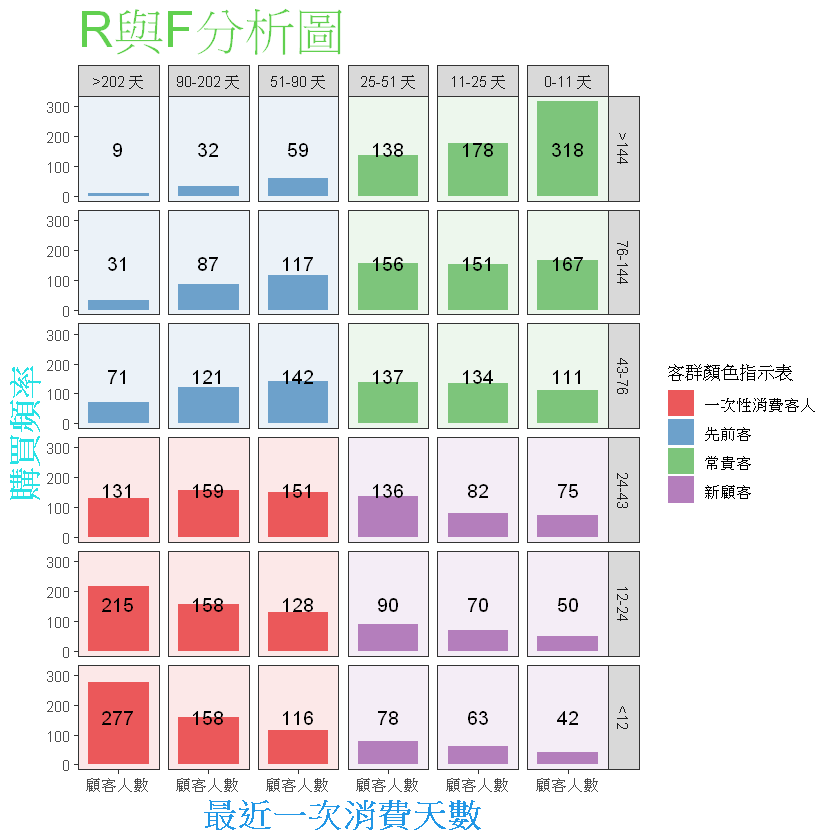

In [112]:


lcg.adv <- lcg %>%
  mutate(rec.type = ifelse(Recency %in% c(">202 天", "90-202 天", "51-90 天"), "not recent", "recent"),
         freq.type = ifelse(Frequency %in% c(">144", "76-144", "43-76"), "frequent", "infrequent"))  %>% 
  mutate(customer.type = ifelse(interaction(rec.type, freq.type)=='not recent.frequent','先前客',
                               ifelse(interaction(rec.type, freq.type)=='recent.frequent','常貴客',
                                     ifelse(interaction(rec.type, freq.type)=='not recent.infrequent','一次性消費客人','新顧客'))))

levels(factor(lcg.adv$customer.type))
ggplot(lcg.adv, aes(x=client, y=quantity, fill=customer.type)) +
  theme_bw() +
  theme(panel.grid = element_blank()) +
  geom_rect(aes(fill = customer.type), xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf, alpha = 0.1) +
  facet_grid(Frequency ~ Recency) +
  geom_bar(stat='identity', alpha=0.7) +
  geom_text(aes(y=max(quantity)/2, label=quantity), size=4) +
  ggtitle("R與F分析圖") +
  xlab("最近一次消費天數") + ylab("購買頻率")+ 
  theme(plot.title = element_text(color="3", size=30 ),
        axis.title.x = element_text(color="4", size=20, face="bold"),
        axis.title.y = element_text(color="5", size=20, face="bold"))+
  guides(fill=guide_legend(title="客群顏色指示表"))+
  scale_fill_brewer(palette='Set1',labels = levels(factor(lcg.adv$customer.type)))